In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data set: kaggle <Titanic - Machine Learning from Disaster>
# https://www.kaggle.com/competitions/titanic/overview
df = pd.read_csv('/content/drive/MyDrive/Visualization_Assignment/train.csv', index_col = 'PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

* 생존자 및 사망자 인원 확인

In [13]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* 객실 등급별 생존 및 사망 여부

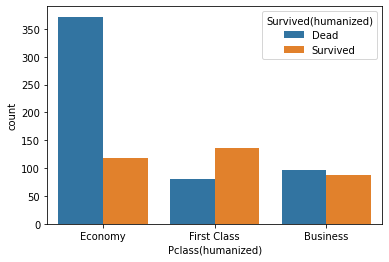

In [14]:
# 생존 여부에 따라 신규 컬럼에 Dead/Survived 추가
df['Survived(humanized)'] = df['Survived'].replace(0, 'Dead').replace(1, 'Survived')

# Ticket의 Class에 따라 First / Business / Economy Class 삽입
df["Pclass(humanized)"] = df['Pclass'].replace(1, "First Class").replace(2, "Business").replace(3, "Economy")

# Ticket의 Class별 생존자 수 / 사망자 수를 countplot 그래프로 출력
sns.countplot(data = df, x="Pclass(humanized)", hue = 'Survived(humanized)')


* 성별에 따른 생존 및 사망 여부

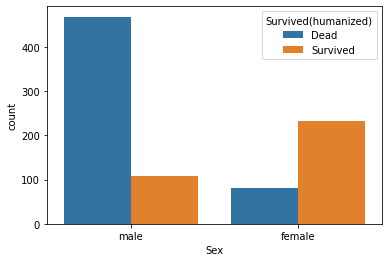

In [15]:
sns.countplot(data=df, x="Sex", hue="Survived(humanized)")

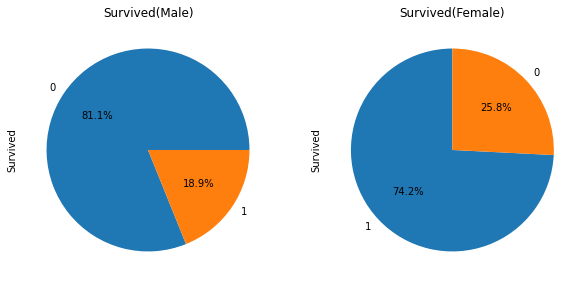

In [26]:
f, ax = plt.subplots(1,2, figsize=(10,5))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(
    autopct='%.1f%%',
    ax=ax[0]
)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(
    autopct='%.1f%%', # autopct : 자동으로 퍼센트 입력
    startangle=90,
    counterclock=True,
    ax=ax[1] 
)
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')
plt.show()

* 나이의 분포와, 나이에 따른 누적 생존률 그래프

In [25]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

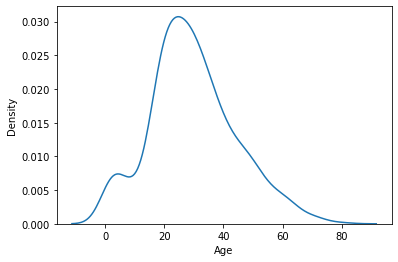

In [16]:
sns.kdeplot(df['Age'])

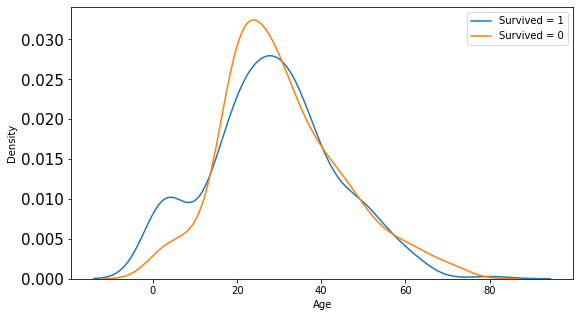

In [17]:
plt.rc("ytick", labelsize = 15)
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

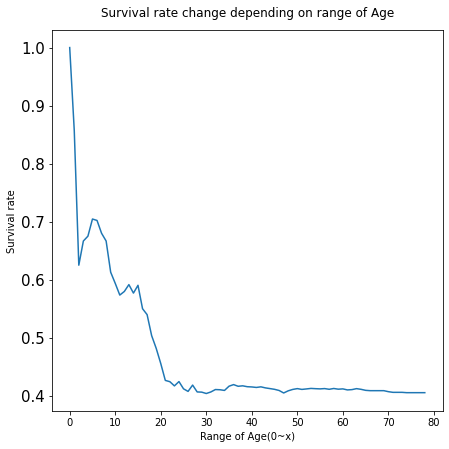

In [18]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df[df['Age'] < i]['Survived'].sum() / len(df[df['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()